In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Print the dimensions of the datasets
print(f'Shape of train data is: {train_data.shape}\nShape of test data is: {test_data.shape}')

Shape of train data is: (7352, 563)
Shape of test data is: (2947, 563)


In [3]:
# Display the first few rows of the updated dataset
train_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
# Generate descriptive statistics of the dataset's numerical columns
train_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [5]:
# Display the unique activity labels present in the 'Activity' column of the training data
train_data['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<Axes: >

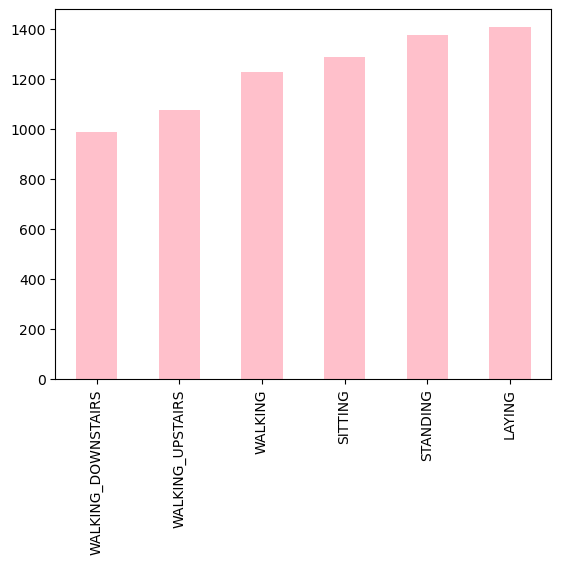

In [6]:
# Create a bar plot to visualize the distribution of activity labels in the 'Activity' column
train_data['Activity'].value_counts().sort_values().plot(kind = 'bar', color = 'pink')

In [7]:
# Split the training data into features and target
X_train = train_data.drop(columns=['Activity'])
y_train = train_data['Activity']

# Split the test data into features and target
X_test = test_data.drop(columns=['Activity'])
y_test = test_data['Activity']

In [8]:
# Display the dimensions of the training feature set and targets
X_train.shape, y_train.shape

((7352, 562), (7352,))

In [9]:
# Display the dimensions of the testing feature set and targets
X_test.shape, y_test.shape

((2947, 562), (2947,))

In [10]:
#Label encoding on the target variables
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [11]:
#Display the dimensions of datasets and targets for testing and training
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((2947, 562), (2947,), (7352, 562), (7352,))

In [12]:
#Feature scaling on the training and testing feature data
scaling_data = MinMaxScaler()
X_train = scaling_data.fit_transform(X_train)
X_test = scaling_data.transform(X_test)

In [13]:
# Define hyperparameters
batch_size = 32
epochs = 10
lstm_units = 64
learning_rate = 0.001

In [14]:
# Create a Sequential neural network model
model = Sequential()
# Add a fully connected (Dense) layer with 64 units, ReLU activation, and input dimension matching the features in X_train
model.add(Dense(units=64,kernel_initializer='normal',activation='relu',input_dim=X_train.shape[1]))
# Add a Dropout layer with a dropout rate of 20% to prevent overfitting
model.add(Dropout(0.2))
# Add another Dense layer with 32 units and softmax activation
model.add(Dense(units=32,kernel_initializer='normal',activation='softmax'))
# Compile the model with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
# Train the neural network model using the training data
history = model.fit(X_train, y_train, batch_size = 64, epochs= 10, validation_data = (X_test,y_test))

Epoch 1/10
115/115 [==============================] - 0s 3ms/step - loss: 0.1746 - accuracy: 0.9351 - val_loss: 0.1914 - val_accuracy: 0.9257
Epoch 2/10
115/115 [==============================] - 0s 2ms/step - loss: 0.1627 - accuracy: 0.9437 - val_loss: 0.1732 - val_accuracy: 0.9379
Epoch 3/10
115/115 [==============================] - 0s 3ms/step - loss: 0.1470 - accuracy: 0.9475 - val_loss: 0.1859 - val_accuracy: 0.9233
Epoch 4/10
115/115 [==============================] - 0s 2ms/step - loss: 0.1352 - accuracy: 0.9523 - val_loss: 0.1766 - val_accuracy: 0.9287
Epoch 5/10
115/115 [==============================] - 0s 2ms/step - loss: 0.1298 - accuracy: 0.9533 - val_loss: 0.1969 - val_accuracy: 0.9155
Epoch 6/10
115/115 [==============================] - 0s 2ms/step - loss: 0.1246 - accuracy: 0.9547 - val_loss: 0.1592 - val_accuracy: 0.9372
Epoch 7/10
115/115 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.9607 - val_loss: 0.1724 - val_accuracy: 0.9281
Epoch 

In [16]:
# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                36032     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
Total params: 38112 (148.88 KB)
Trainable params: 38112 (148.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

93/93 [==============================] - 0s 1ms/step - loss: 0.1969 - accuracy: 0.9216
Test accuracy: 0.9216151833534241


In [18]:
# Extract training and validation loss, and training and validation accuracy from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Determine the minimum length of recorded values to ensure equal lengths for plotting
min_len = min(len(train_accuracy), len(val_accuracy))
# Truncate the lists to the minimum length to match epoch
train_accuracy = train_accuracy[:min_len]
val_accuracy = val_accuracy[:min_len]
train_loss = train_loss[:min_len]
val_loss = val_loss[:min_len]

print("Length of train_accuracy:", len(train_accuracy))
print("Length of val_accuracy:", len(val_accuracy))

Length of train_accuracy: 10
Length of val_accuracy: 10


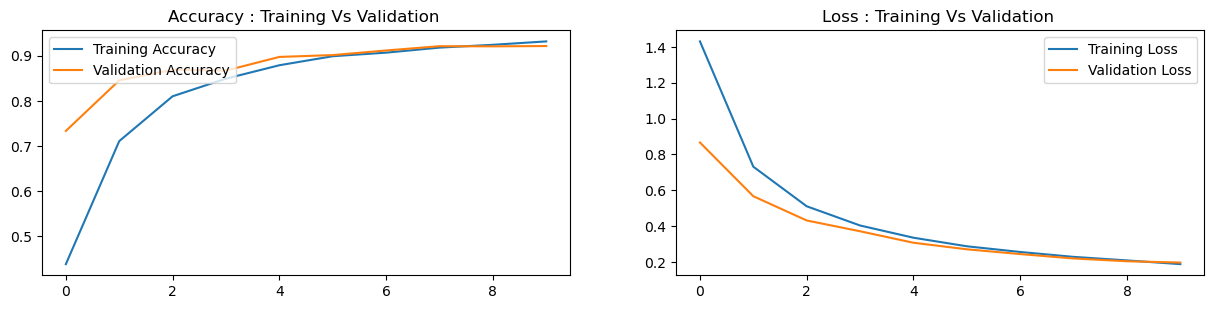

In [19]:
# Create a figure with subplots for accuracy and loss visualizations
plt.figure(figsize=(15, 7))
# Subplot 1: Accuracy visualization
plt.subplot(2, 2, 1)
plt.plot(range(10), train_accuracy, label='Training Accuracy')
plt.plot(range(10), val_accuracy, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy : Training Vs Validation ')


# Subplot 2: Loss visualization
plt.subplot(2, 2, 2)
plt.plot(range(10), train_loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.title('Loss : Training Vs Validation ')
plt.legend(loc='upper right')
# Display the subplots
plt.show()